# K-Means color quantization

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
image_as_array = mpimg.imread('sand.jpg')
image_as_array

array([[[153, 209, 244],
        [152, 208, 243],
        [151, 207, 242],
        ...,
        [138, 201, 244],
        [137, 200, 244],
        [135, 198, 242]],

       [[152, 208, 243],
        [152, 208, 243],
        [152, 208, 243],
        ...,
        [139, 202, 245],
        [137, 200, 244],
        [135, 198, 242]],

       [[153, 209, 244],
        [153, 209, 244],
        [153, 209, 244],
        ...,
        [140, 203, 246],
        [138, 201, 245],
        [136, 199, 243]],

       ...,

       [[ 55, 132, 162],
        [ 61, 137, 169],
        [ 61, 140, 171],
        ...,
        [133, 199, 223],
        [132, 198, 224],
        [129, 195, 221]],

       [[ 53, 130, 160],
        [ 59, 136, 166],
        [ 58, 137, 168],
        ...,
        [132, 198, 222],
        [130, 196, 222],
        [128, 193, 221]],

       [[ 51, 128, 158],
        [ 57, 134, 164],
        [ 57, 136, 167],
        ...,
        [132, 198, 222],
        [130, 196, 222],
        [127, 193, 219]]

In [3]:
# height, width, color channels
image_as_array.shape

(156, 104, 3)

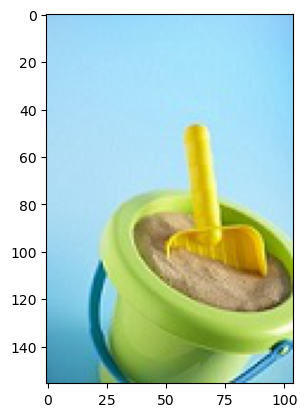

In [4]:
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) -> (h * w,c)

In [5]:
(h, w, c) = image_as_array.shape
image_as_array2d = image_as_array.reshape(h * w, c)

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=6, n_init=10)

In [8]:
labels = model.fit_predict(image_as_array2d)

In [9]:
# these are the 6 RGB color codes
model.cluster_centers_

array([[165.70399746, 222.15778342, 246.85892555],
       [205.86568987, 171.99267399,  15.15995116],
       [ 80.88510101, 162.07954545, 189.2790404 ],
       [188.92198336, 203.08252427, 114.32524272],
       [ 12.96108949,  93.27237354, 102.6614786 ],
       [125.49702381, 142.46428571,  55.01388889]])

In [10]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[166, 222, 247],
       [206, 172,  15],
       [ 81, 162, 189],
       [189, 203, 114],
       [ 13,  93, 103],
       [125, 142,  55]])

In [11]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))
quantized_image

array([[[166, 222, 247],
        [166, 222, 247],
        [166, 222, 247],
        ...,
        [166, 222, 247],
        [166, 222, 247],
        [166, 222, 247]],

       [[166, 222, 247],
        [166, 222, 247],
        [166, 222, 247],
        ...,
        [166, 222, 247],
        [166, 222, 247],
        [166, 222, 247]],

       [[166, 222, 247],
        [166, 222, 247],
        [166, 222, 247],
        ...,
        [166, 222, 247],
        [166, 222, 247],
        [166, 222, 247]],

       ...,

       [[ 81, 162, 189],
        [ 81, 162, 189],
        [ 81, 162, 189],
        ...,
        [166, 222, 247],
        [166, 222, 247],
        [166, 222, 247]],

       [[ 81, 162, 189],
        [ 81, 162, 189],
        [ 81, 162, 189],
        ...,
        [166, 222, 247],
        [166, 222, 247],
        [166, 222, 247]],

       [[ 81, 162, 189],
        [ 81, 162, 189],
        [ 81, 162, 189],
        ...,
        [166, 222, 247],
        [166, 222, 247],
        [166, 222, 247]]

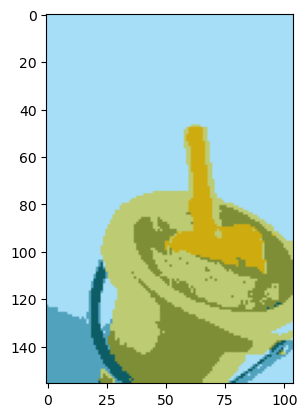

In [12]:
plt.imshow(quantized_image)